In [ ]:
# %load_ext autoreload
# %autoreload 2

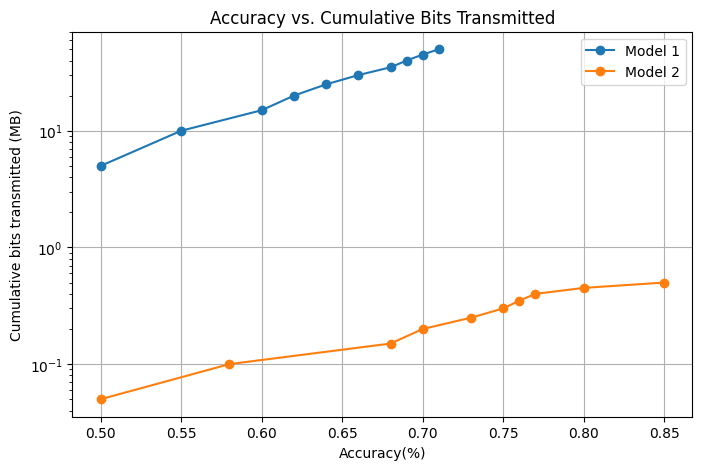

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Simulated example data
# rounds = 10
# accuracies = [0.50, 0.55, 0.60, 0.62, 0.64, 0.66, 0.68, 0.69, 0.70, 0.71]  # after each round
# accuracies2 = [0.50, 0.58, 0.68, 0.70, 0.73, 0.75, 0.76, 0.77, 0.80, 0.85]  # after each round
# bits_per_round = [5e6] * rounds  # assume 5MB per round (e.g., model size = 5MB)
# bits_per_round2 = [5e4] * rounds  # assume 5MB per round (e.g., model size = 5MB)

# # Compute cumulative bits transmitted
# cumulative_bits = np.cumsum(bits_per_round)
# cumulative_bits2 = np.cumsum(bits_per_round2)

# # Plot
# plt.figure(figsize=(8, 5))
# plt.plot(accuracies, cumulative_bits / 1e6, marker='o')  # divide by 1e6 to show MB
# plt.plot(accuracies2, cumulative_bits2 / 1e6,  marker='o')  # divide by 1e6 to show MB
# plt.xlabel('Accuracy(%)')
# plt.ylabel('Cumulative bits transmitted (MB)')
# plt.title('Accuracy vs. Cumulative Bits Transmitted')
# plt.grid()
# plt.legend(['Model 1', 'Model 2'])
# plt.yscale('log')
# # plt.yscale('linear')
# # plt.xlim(0.1, 100)
# # plt.ylim(0.4, 1)





In [ ]:
# from omegaconf import OmegaConf
# cfg = OmegaConf.load("./cfg.yaml")

In [ ]:
# import os
# from datetime import datetime
# cfg.now = datetime.now().strftime("%Y%m%d_%H%M%S")
# cfg.root_dir = os.path.join(cfg.root_dir, cfg.project_name)
# cfg.save_dir = os.path.join(cfg.root_dir, cfg.now, cfg.save_dir)
# cfg.log_dir = os.path.join(cfg.root_dir, cfg.now, cfg.log_dir)
# cfg.res_dir = os.path.join(cfg.root_dir, cfg.now, cfg.res_dir)
# cfg.num_clients = 1

In [ ]:
# from fedai.FLearner import client_fn
# from fedai.federated.agents import pFedMe, AgentRole
# client = client_fn(pFedMe, cfg, 22, {}, 1, state_dir= "local_output_")

22
22


In [ ]:
# import torch
# from fedai.FLearner import client_fn
# from fedai.wandb_writer import WandbWriter
# server  =pFedMe(cfg= cfg, block= None, id= -1, state= None, role= AgentRole.SERVER)  # noqa: F405
# server.server_init(client_fn, "client_selector", pFedMe, torch.nn.CrossEntropyLoss(), WandbWriter(cfg))

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ahmed-elbakary (edge-ai-team). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/ahmed/.netrc


In [ ]:
# for i in range(1, 10):
#     server.cfg.agg = cfg.agg = 'mtl'
#     client = client_fn(pFedMe, cfg, 0, server.latest_round, i, state_dir= "local_output_")
#     server.latest_round[client.id] = i
#     client.fit()
#     client.communicate(server)
#     server.evaluate(i)


In [ ]:
# client.train_ds[0]['x'].shape

torch.Size([3, 32, 32])

In [ ]:
import os   
import torch
c1 = torch.load('coalitions.pth', weights_only= False)
c2 = torch.load('coalitions2.pth', weights_only= False)
c3 = torch.load('coalitions3.pth', weights_only= False)
c4 = torch.load('coalitions4.pth', weights_only= False)
c5 = torch.load('coalitions5.pth', weights_only= False)
c1, c2, c3, c4, c5

({0: [19, 12, 7, 3], 1: [16, 15, 5, 4, 14, 6]},
 {0: [10, 7, 2, 14], 1: [0, 5, 18, 16, 12, 4]},
 {1: [0, 18, 11], 2: [6, 17, 9, 12], 0: [8, 4, 10]},
 {0: [5, 19, 9, 16, 4], 1: [2, 10, 0, 12, 1]},
 {0: [3, 1, 16, 13], 1: [4, 5, 15], 2: [9, 10, 2]})

In [ ]:
# coalitions[1]

[1, 2, 3, 4, 6, 9]

In [ ]:
# for col_ind, lst_clients in coalitions.items():
#     print(f'Coalition {col_ind}: {lst_clients}')

Coalition 0: [0, 5, 7, 8]
Coalition 1: [1, 2, 3, 4, 6, 9]


In [ ]:
def read_graphs(n_graphs= 5):
    import pickle
    import networkx as nx
    lst = []
    for i in range(1, n_graphs+1):
        with open(f'graph_{i}.gpickle', 'rb') as f:
            G = pickle.load(f)
            lst.append(G)
    return lst

In [ ]:
lst_graphs = read_graphs(5)

In [ ]:
# import pickle
# import networkx as nx
# with open('graph_1.gpickle', 'rb') as f:
#     G = pickle.load(f)

In [ ]:
# # get the labels of the nodes
# node_labels = nx.get_node_attributes(G, 'label')
# node_labels

{0: 19, 1: 16, 2: 15, 3: 5, 4: 4, 5: 12, 6: 14, 7: 7, 8: 3, 9: 6}

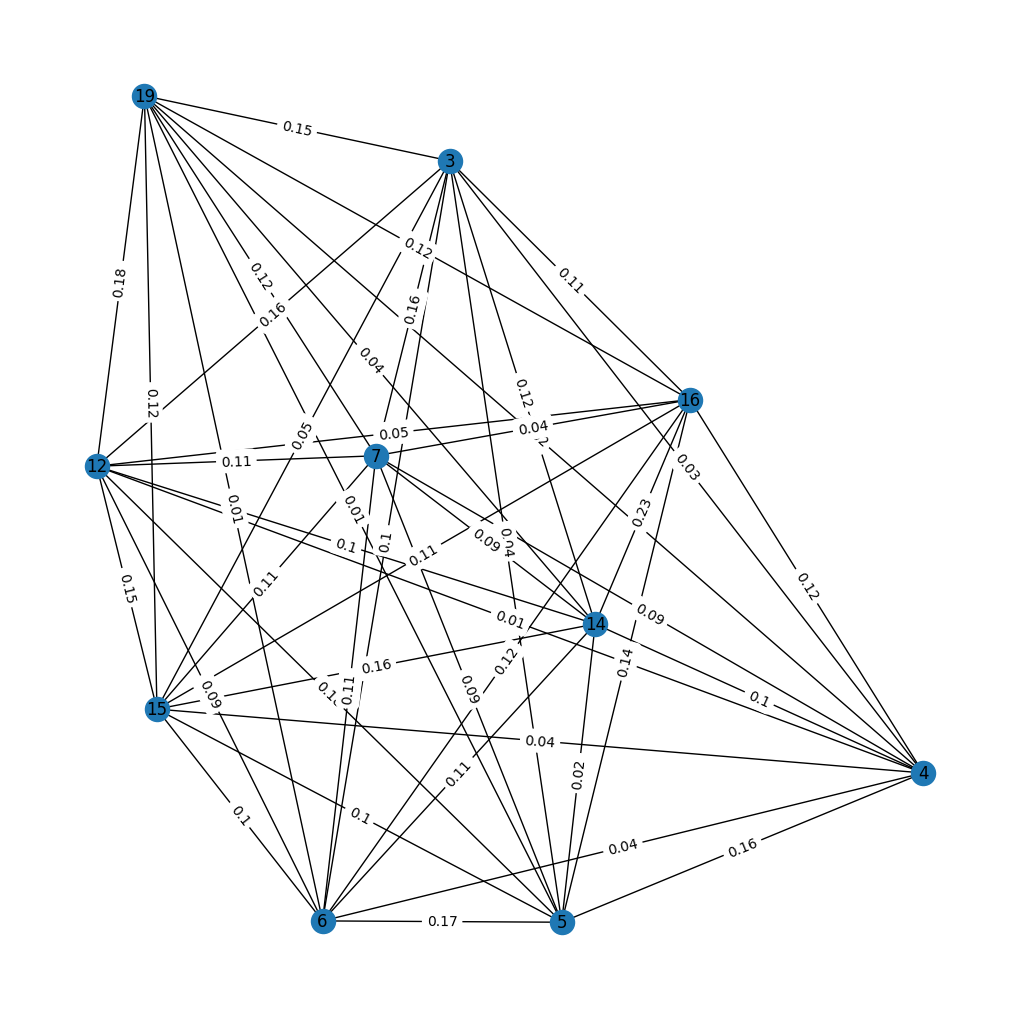

In [ ]:
# # # draw  graph
# import matplotlib.pyplot as plt
# import networkx as nx
# plt.figure(figsize=(10,10))

# node_labels = nx.get_node_attributes(lst_graphs[0], 'label')
# labels = [v for k, v in node_labels.items()]
          
# pos = nx.spring_layout(lst_graphs[0], seed=42)  # positions for all nodes
# nx.draw(lst_graphs[0], pos, with_labels=True, labels=node_labels)

# # only take 2 decimal places
# labels = nx.get_edge_attributes(lst_graphs[0],'weight')
# labels = {k:round(v,2) for k,v in labels.items()}

# nx.draw_networkx_edge_labels(lst_graphs[0], pos, edge_labels=labels)
# plt.show()


In [ ]:
c1, c2

({0: [19, 12, 7, 3], 1: [16, 15, 5, 4, 14, 6]},
 {0: [10, 7, 2, 14], 1: [0, 5, 18, 16, 12, 4]})

In [ ]:
import networkx as nx

def build_cluster_graph(graph, cluster_dict):

    node_labels = nx.get_node_attributes(graph, 'label') #{0: 19, 1: 16, 2: 15

    labels_edges = nx.get_edge_attributes(graph,'weight') #{(0, 1): 0.15, (0, 2): 0.04

    labels_edges = {(node_labels[k[0]], node_labels[k[1]]):v for k,v in labels_edges.items()} #{(19, 16): 0.15, (19, 15): 0.04
    labels_edges = {k:round(v,2) for k,v in labels_edges.items()} #{(19, 16): 0.15, (19, 15): 0.04

    weights = {}
    for k, v in labels_edges.items():
        weights[(k[0], k[1])] = v
        weights[(k[1], k[0])] = v

    print(weights)
    G = nx.Graph()

    # Add all nodes
    for cluster_nodes in cluster_dict.values(): # [[10, 7, 2, 14], [0, 5, 18, 16, 12, 4]]
        G.add_nodes_from(cluster_nodes)

    # Add edges to fully connect nodes within each cluster
    for cluster_nodes in cluster_dict.values(): #[[10, 7, 2, 14], [0, 5, 18, 16, 12, 4]]
        for i, u in enumerate(cluster_nodes): 
            for v in cluster_nodes[i+1:]:
                G.add_edge(u, v, weight=weights[(u, v)])  # or any default weight

    return G, weights


In [ ]:
lst_graphs[1], c1

(<networkx.classes.graph.Graph>,
 {0: [19, 12, 7, 3], 1: [16, 15, 5, 4, 14, 6]})

{(0, 1): 0.15299939160459056, (0, 2): 0.044280243330100694, (0, 3): 0.11982553668855707, (0, 4): 0.08912677938942482, (0, 5): 0.17988441301917288, (0, 6): 0.024176210695962628, (0, 7): 0.06533309275635449, (0, 8): 0.1698741392580581, (0, 9): 0.204943623916513, (1, 2): 0.07255478361009766, (1, 3): 0.15811957261299045, (1, 4): 0.06454997175433509, (1, 5): 0.027872361802649646, (1, 6): 0.07230333927846536, (1, 7): 0.07566768808715907, (1, 8): 0.009788992123330788, (1, 9): 0.08625237697109947, (2, 3): 0.022574585302874223, (2, 4): 0.131594921891417, (2, 5): 0.12782377010055102, (2, 6): 0.15192804769119614, (2, 7): 0.15195289211384772, (2, 8): 0.14932734385738117, (2, 9): 0.12034541990286787, (3, 4): 0.14013182968863602, (3, 5): 0.04230199169232739, (3, 6): 0.14219329923780938, (3, 7): 0.00839591856994748, (3, 8): 0.15901683365948624, (3, 9): 0.11711416021624253, (4, 5): 0.08114297224235908, (4, 6): 0.06740114950378856, (4, 7): 0.16276202232529108, (4, 8): 0.07245031550024933, (4, 9): 0.129

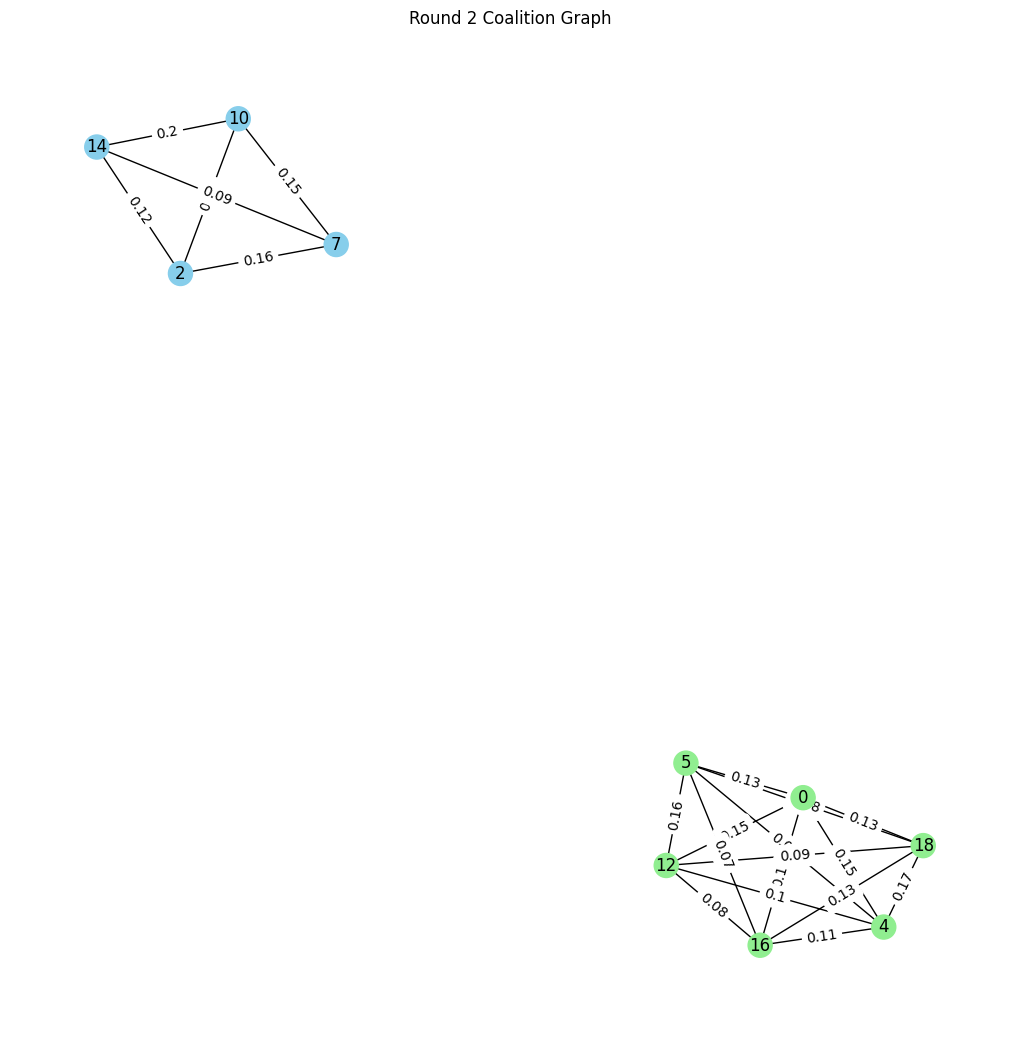

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx


G, weights = build_cluster_graph(lst_graphs[1], c2)

# Assign colors per cluster
color_map = []
node_to_cluster = {node: cid for cid, nodes in c2.items() for node in nodes}
for node in G.nodes():
    if node_to_cluster[node] == 0:
        color_map.append('skyblue')
    else:
        color_map.append('lightgreen')

# Optional: assign labels (can be custom)
node_labels = {node: str(node) for node in G.nodes()}

# Layout and draw
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color=color_map, labels=node_labels)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Round 2 Coalition Graph")
plt.axis('off')
plt.show()


In [ ]:
# import ujson
# # read the data

# with open('./my_examples/Cifar-10/data/train/cifa_train.json', 'r') as f:
#     train_data = ujson.load(f)



In [ ]:
# train_data["user_data"].keys()

dict_keys(['f_00000', 'f_00001', 'f_00002', 'f_00003', 'f_00004', 'f_00005', 'f_00006', 'f_00007', 'f_00008', 'f_00009', 'f_00010', 'f_00011', 'f_00012', 'f_00013', 'f_00014', 'f_00015', 'f_00016', 'f_00017', 'f_00018', 'f_00019'])

In [ ]:
# # extract each client data and save it as hdf5 file
# import h5py
# import numpy as np
# import os

# for k, v in train_data["user_data"].items():
#     user_data = train_data["user_data"][k]
#     with h5py.File(f'./my_examples/Cifar-10/data/train/{k}', 'w') as f:
#         f.create_dataset('x', data=np.array(user_data["x"]))
#         f.create_dataset('y', data=np.array(user_data["y"]))
  

In [ ]:
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


## Custom Dataset class

In [ ]:
# import zipfile
# import torch
# import os
# import gdown
# import h5py
# import numpy as np

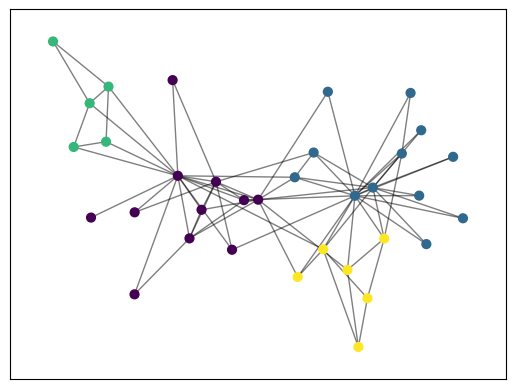

In [ ]:
# from community import community_louvain
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt
# import networkx as nx

# # load the karate club graph
# G = nx.karate_club_graph()

# # compute the best partition
# partition = community_louvain.best_partition(G)

# # draw the graph
# pos = nx.spring_layout(G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# # save as pdf
# plt.savefig("outcome.png")
# plt.show()

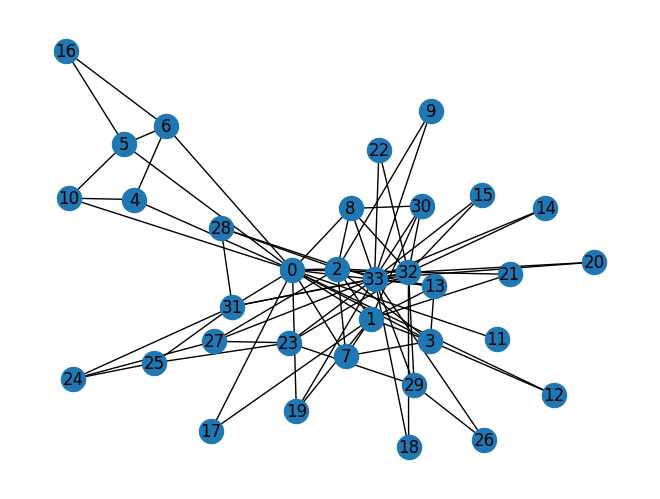

In [ ]:
# # draw the original graph G
# nx.draw(G, with_labels=True)
# plt.savefig("original.png")
# plt.show()
